In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('resources/crypto_data.csv')

In [3]:
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Drop any rows with False
df = df.drop(df.index[df['IsTrading'] == False]).dropna()

# Drop IsTrading column
df = df.drop("IsTrading", 1)
df = df.drop("CoinName", 1)
df = df.drop("Unnamed: 0", 1)
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [5]:
df["TotalCoinSupply"] = df["TotalCoinSupply"].astype("float64")

In [6]:
df = df.drop(df.index[df['TotalCoinsMined'] <=0 ])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 20.8+ KB


In [8]:
df2 = pd.get_dummies(df, drop_first = True)

In [9]:
df2

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Standarize data with StandarScaler
df2_scaled = StandardScaler().fit_transform(df2)
df2_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [11]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the iris data.
df2_pca = pca.fit_transform(df2_scaled)

In [12]:
# Transform PCA data to a DataFrame
df2_pca = pd.DataFrame(
#     data=df2_pca, columns=["principal component 1", "principal component 2"]
    data=df2_pca
)
df2_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335914,1.043405,-0.537409,0.001347,-1.969949e-15,-3.002582e-14,-0.013578,-1.329940,-0.053106,-0.333927,...,6.949388e-15,4.969006e-15,3.005585e-15,1.179327e-15,-4.716532e-15,-4.647087e-15,-1.081508e-15,1.950064e-15,3.745908e-18,2.250944e-15
1,-0.319249,1.043547,-0.537804,0.001337,-1.911312e-15,-3.008295e-14,-0.014190,-1.332705,-0.057966,-0.330612,...,6.715857e-15,4.702677e-15,3.027053e-15,1.196614e-15,-4.277167e-15,-4.511453e-15,-9.556418e-16,1.865078e-15,-2.424426e-16,2.460925e-15
2,2.304716,1.669996,-0.624077,0.004420,1.291461e-15,-4.455097e-14,-0.062312,-1.554093,-0.945690,0.375087,...,1.014711e-13,-4.555445e-15,-8.748362e-14,-5.100915e-14,1.211390e-14,2.190433e-14,4.654967e-14,-1.697261e-15,4.981862e-14,5.918287e-14
3,-0.145455,-1.323925,0.177429,-0.001167,4.079147e-16,1.161180e-14,0.000326,0.283548,0.252906,-0.079820,...,1.312974e-14,-4.721778e-15,-1.191351e-14,-3.877248e-15,4.074976e-15,3.858992e-16,7.563333e-15,-5.677910e-16,9.595608e-15,1.165767e-14
4,-0.151951,-2.044976,0.364208,-0.001636,1.885093e-15,2.013081e-14,0.032350,0.524429,0.191031,0.074021,...,9.141641e-14,-5.609395e-14,-9.365937e-14,2.581504e-14,1.580768e-14,5.263765e-14,1.894672e-14,3.263168e-14,7.875042e-14,1.030335e-13


In [13]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.02851314, 0.02183228, 0.02093007, 0.02087258, 0.02087257,
       0.02087257, 0.02085124, 0.01910435, 0.0179288 , 0.01777379,
       0.01662938, 0.01629408, 0.01583495, 0.01464966, 0.0134856 ,
       0.01262337, 0.01231377, 0.01127287, 0.01093674, 0.01070932,
       0.01062572, 0.01060732, 0.01059359, 0.0105697 , 0.01055562,
       0.01051051, 0.01049655, 0.01049558, 0.01049558, 0.01049558,
       0.01049381, 0.01048438, 0.01047714, 0.01047581, 0.01047329,
       0.01047115, 0.01046928, 0.01046411, 0.01046265, 0.01045618,
       0.01045597, 0.01045597, 0.01045525, 0.01045351, 0.01044982,
       0.01044805, 0.0104431 , 0.01043743, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628])

In [14]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(df2_pca)
tsne_features.shape

(532, 2)

In [15]:
# Prepare to plot the dataset
# The first column of transformed features
df2['x'] = tsne_features[:,0]

# The second column of transformed features
df2['y'] = tsne_features[:,1]

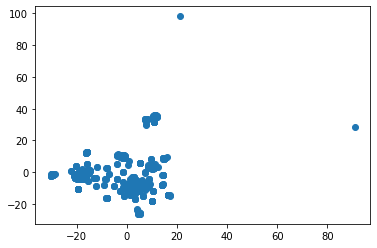

In [16]:
plt.scatter(df2['x'], df2['y'])
plt.show()

In [20]:
# plt.scatter(tsne_features[:,0], tsne_features[:,1])
# plt.show()

In [19]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df2)
    inertia.append(km.inertia_)

C:\Users\Hamilton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


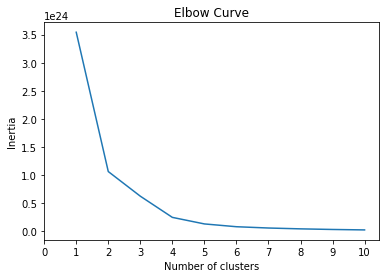

In [19]:
# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [21]:


k_means_df = pd.DataFrame(tsne_features).reset_index(drop=True)
k_means_df



,0,1
0,-15.083451,1.496977
1,-21.137646,-2.383214
2,-28.830143,-1.278308
3,10.800467,35.692234
4,9.888496,-18.093269
...,...,...
527,7.871875,30.369081
528,-18.038506,-3.895819
529,4.426429,-25.900080
530,16.567116,-14.501665


In [28]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=42)

# Train the model
model.fit(k_means_df)

# Predict clusters
predictions = model.predict(k_means_df)

# Create return DataFrame with predicted clusters
k_means_df["class"] = model.labels_
k_means_df.head()

,0,1,class
0,-15.083451,1.496977,1
1,-21.137646,-2.383214,1
2,-28.830143,-1.278308,1
3,10.800467,35.692234,2
4,9.888496,-18.093269,0


In [29]:
# Check class value counts
k_means_df['class'].value_counts()

0    225
1    147
3    109
2     51
Name: class, dtype: int64

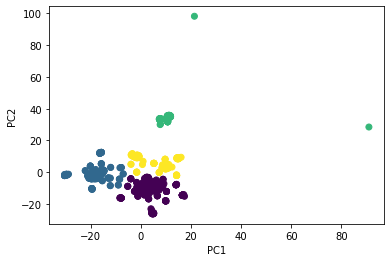

In [30]:
# Visualize the clusters
plt.scatter(k_means_df[0], k_means_df[1], c=k_means_df['class'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Recommendation
##### Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be clustered together? If so, into how many clusters?
### Based on PCA unsupervised model, k-clusters, and elbow graph the cyptocurrencies can be grouped into four clusters for classification.